# DC Chargers in Canada

Breaking down EV charging stations across Canada by province/territory, network, and charger type. The purpose is to get a better idea of how chargers are distributed across the country, especially DC Fast Chargers (DCFC). If we want a more environmentally firendly future, these networks will have to expand rapidly.

-Using numpy, pandas, and seaborn.

-Made in Jupyter using Anaconda

-Data from the National Renewable Energy Laboratory in the U.S.
    If you wish you to replicate these results, you'll have to get an API key and download the following csv file https://developer.nrel.gov/api/alt-fuel-stations/v1.csv?country=CA&fuel_type=ELEC&api_key=xxx

-I'll be updating this with more graphs and data in the future.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
ev_chargers = pd.read_csv("electric chargers in CAN.csv")

In [3]:
ev_chargers

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source
0,ELEC,Ramada,1319 2nd St W,NaN,Brooks,AB,T1R 1P7,NaN,403-362-6440,E,...,Free,Gratuit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ELEC,Davis Chevrolet,149 E Lake Crescent NE,NaN,Airdrie,AB,T4A 2H9,NaN,403-948-6909,E,...,Free,Gratuit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ELEC,Go Nissan South,1275 101 St SW,NaN,Edmonton,AB,T6X 1A1,NaN,877-706-0192,E,...,Free,Gratuit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ELEC,Don Wheaton Chevrolet,10727 - 82 Ave,NaN,Edmonton,AB,T6E 2B1,NaN,NaN,E,...,Free,Gratuit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ELEC,Gasonic Instruments,8-823 41st Ave NE,NaN,Calgary,AB,T2E 6Y3,NaN,403-276-2201,E,...,Free,Gratuit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,ELEC,Canmore,300 OLD CANMORE RD,NaN,Canmore,BC,T1W 2X2,NaN,833-231-3226,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5918,ELEC,City of Victoria - Broad Street,1300 Broad Street,NaN,Victoria,BC,V8W 1P6,NaN,888-356-8911,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5919,ELEC,7121 107 avenue SE,7121 107 Avenue,NaN,Calgary,AB,T2C 2B8,NaN,888-356-8911,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5920,ELEC,861 rue de l'Église,861 rue de l'Église,NaN,Sainte-Béatrix,QC,J0K 1Y0,NaN,855-999-8378,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ev_chargers.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Other Info', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Federal Agency ID', 'Federal Agency Name', 'Open Date',
       'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'EV Connector Types', 'Country',
       'Intersection Directions (French)', 'Access Days Time (French)',
       'BD Blends (French)', 'Groups With Access Code (French)',
       'Hydrogen Is Retail', 'Access Code', 'Access Detail Code',
       'Federal Agency Code', 'Facility Type', 'CNG Dispenser N

Remove columns that contain undefined values, and rows that are duplicates from the original df (inplace=True). This gets rid of a lot of columns.

In [5]:
ev_chargers.dropna(axis=1,thresh=1,inplace=True)
ev_chargers.drop_duplicates(inplace = True)

In [6]:
ev_chargers.columns

Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Station Phone',
       'Status Code', 'Expected Date', 'Groups With Access Code',
       'Access Days Time', 'Cards Accepted', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV DC Fast Count', 'EV Network',
       'EV Network Web', 'Geocode Status', 'Latitude', 'Longitude',
       'Date Last Confirmed', 'ID', 'Updated At', 'Owner Type Code',
       'Open Date', 'EV Connector Types', 'Country',
       'Intersection Directions (French)', 'Access Days Time (French)',
       'Groups With Access Code (French)', 'Access Code', 'Access Detail Code',
       'Facility Type', 'EV Pricing', 'EV Pricing (French)',
       'EV On-Site Renewable Source'],
      dtype='object')

## Stations by Province/Territory
Displays the total number of chargers of each type for all 13 provinces and territories and creates a new df containing just those values.

Do this by getting the sum of all the columns by state. Then, only keep the relevant columns (no need for a sum of all the charge station latitudes), and rename them so they're not as long.

In [7]:
ev_chargers.groupby("State").sum()

,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,Latitude,Longitude,ID
State,,,,,,
AB,8.0,395.0,119.0,11740.590473,-25670.327431,26810196
BC,50.0,1950.0,619.0,53501.249422,-131724.699038,140036131
MB,3.0,54.0,64.0,3049.014372,-5968.263617,7294486
NB,0.0,157.0,97.0,6253.977909,-8924.734435,17245375
NL,0.0,57.0,14.0,1827.081107,-2077.503713,4830861
NS,2.0,135.0,36.0,4178.175422,-5921.767878,10791318
ON,80.0,3236.0,1103.0,65350.856120,-117941.343186,179124511
PE,0.0,47.0,8.0,1667.512153,-2282.822867,3942229
QC,7.0,4756.0,871.0,125336.225752,-197403.191309,358741834


In [8]:
ev_chargers_province=ev_chargers.groupby("State").sum()[["EV Level1 EVSE Num",'EV Level2 EVSE Num','EV DC Fast Count']]
ev_chargers_province.columns=["Level 1","Level 2","DCFC"]

In [9]:
ev_chargers_province

,Level 1,Level 2,DCFC
State,,,
AB,8.0,395.0,119.0
BC,50.0,1950.0,619.0
MB,3.0,54.0,64.0
NB,0.0,157.0,97.0
NL,0.0,57.0,14.0
NS,2.0,135.0,36.0
ON,80.0,3236.0,1103.0
PE,0.0,47.0,8.0
QC,7.0,4756.0,871.0


#### Number of stations of each level by province, linear plot

<AxesSubplot:xlabel='Provinces/Territories', ylabel='Number of Stations'>

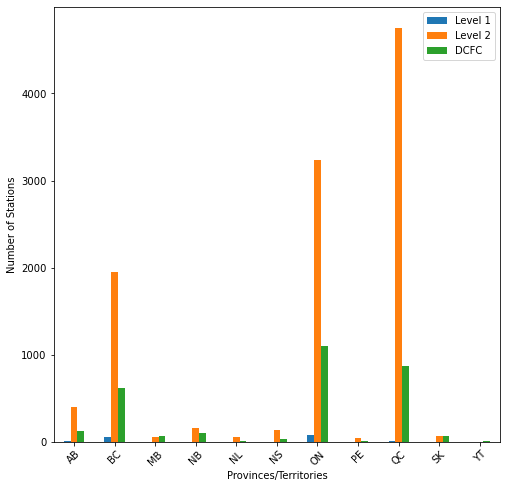

In [10]:
ev_chargers_province.plot(kind="bar",figsize=(8,8),rot=45,xlabel="Provinces/Territories",ylabel="Number of Stations")

#### Number of stations of each level by province, log plot

<AxesSubplot:xlabel='Provinces/Territories', ylabel='Number of Stations'>

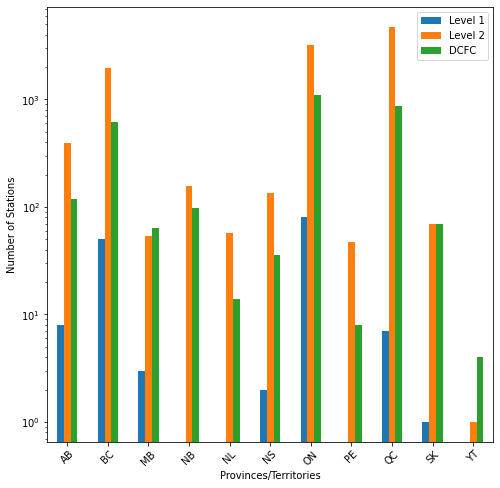

In [11]:
ev_chargers_province.plot(kind="bar",figsize=(8,8),rot=45,logy=True,xlabel="Provinces/Territories",ylabel="Number of Stations")

<AxesSubplot:xlabel='State', ylabel='count'>

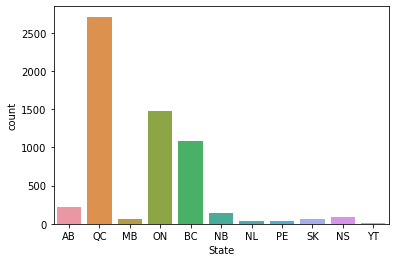

In [12]:
sns.countplot(data=ev_chargers,x="State")

## Stations by Network
Creates a pivot table that breaks down the total number of chargers from each different network in each province.

In [13]:
ev_networks_by_province = ev_chargers.pivot_table(index="State",values="EV DC Fast Count",columns="EV Network",aggfunc=sum).add(ev_chargers.pivot_table(index="State",values="EV DC Fast Count",columns="EV Network",aggfunc=sum))


In [14]:
ev_networks_by_province.insert(0,'SUM',ev_networks_by_province.sum(axis=1))

In [15]:
ev_networks_by_province.loc['CAN']=False
ev_networks_by_province.loc['CAN']=ev_networks_by_province.sum()

In [16]:
ev_networks_by_province.fillna(0).astype(int)

EV Network,SUM,BCHYDRO,ChargePoint Network,Circuit électrique,EV Connect,Electrify Canada,FLO,GE WattStation,Greenlots,Non-Networked,PETROCAN,SWTCH,SemaCharge Network,Sun Country Highway,Tesla,Tesla Destination,eCharge Network
State,,,,,,,,,,,,,,,,,
AB,238,0,10,0,0,0,52,0,4,30,22,0,0,0,116,4,0
BC,1238,128,72,0,0,32,56,0,86,480,40,8,0,0,336,0,0
MB,128,0,10,0,0,0,2,0,0,52,12,0,0,0,52,0,0
NB,194,0,2,0,0,0,2,0,0,30,12,0,0,0,96,0,52
NL,28,0,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0
NS,72,0,0,0,0,0,34,0,0,14,8,0,0,0,16,0,0
ON,2206,0,136,24,0,72,96,0,36,826,56,0,0,0,960,0,0
PE,16,0,0,0,0,0,12,0,0,4,0,0,0,0,0,0,0
QC,1742,0,72,786,0,0,36,0,4,496,28,0,0,0,320,0,0


In [17]:
ev_networks = ev_chargers.groupby("EV Network").sum()[["EV Level1 EVSE Num",'EV Level2 EVSE Num','EV DC Fast Count']]
ev_networks.columns=["Level 1","Level 2","DCFC"]
ev_networks

,Level 1,Level 2,DCFC
EV Network,,,
BCHYDRO,0.0,8.0,64.0
ChargePoint Network,13.0,2034.0,151.0
Circuit électrique,0.0,2359.0,405.0
EV Connect,0.0,3.0,0.0
Electrify Canada,0.0,0.0,52.0
FLO,0.0,2048.0,149.0
GE WattStation,0.0,28.0,0.0
Greenlots,0.0,7.0,65.0
Non-Networked,138.0,2377.0,1003.0


<AxesSubplot:xlabel='Provinces/Territories', ylabel='Number of Stations'>

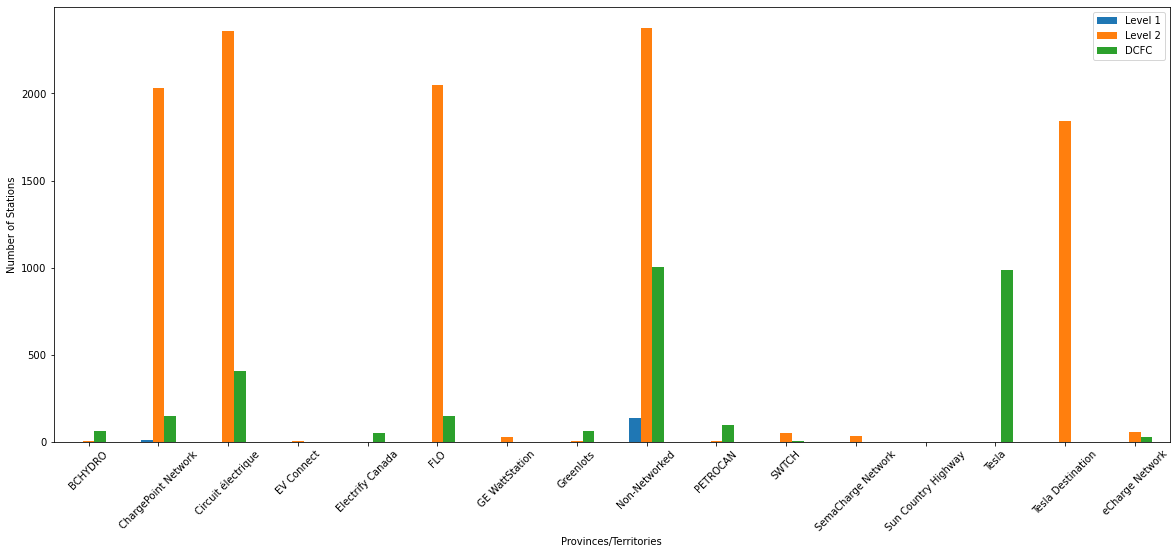

In [18]:
ev_networks.plot(kind="bar",figsize=(20,8),rot=45,xlabel="Provinces/Territories",ylabel="Number of Stations")